In [1]:
import pandas as pd
import numpy as np
import scienceplots as sp
import matplotlib.pyplot as plt

In [2]:
EM=pd.read_csv("Emission trajectories.csv")#排放量文件
PR=pd.read_excel("pyplot.xlsx",sheet_name="Price")#碳价文件
CP2025=pd.read_csv("New Capacity2025.csv")#补贴增加的capacity文件
SD1=pd.read_excel("cost_reduction_v3.xlsx", sheet_name="wind and solar")#补贴量文件
SD2=pd.read_excel("cost_reduction_v3.xlsx", sheet_name="other REs")#补贴量文件

In [3]:
Year=EM["Year"]
EmB=EM["Baseline Emissions"]
EmPO=EM["Pork Emissions"]
Price=PR["Price"]

In [4]:
ED=[]#emission difference
Spending1=[]
for i in range(4,10):#2025~2050
    EDi=EmB[i]-EmPO[i]
    ED.append(EDi)
    spending=(EDi*Price[i-4])*12/44  #1990$/tC
    Spending1.append(spending)
    print(Year[i])
print(len(ED))
print("Unit: million 1990$")

2025
2030
2035
2040
2045
2050
6
Unit: million 1990$


Text(0.5, 1.0, 'Carbon pricing cost, million 1990$')

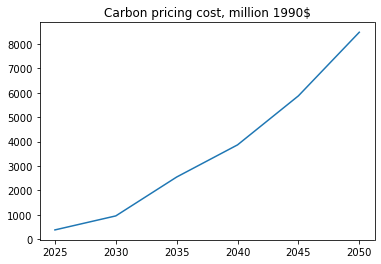

In [5]:
Year2=Year[4:10]
plt.plot(Year2, Spending1)
plt.title("Carbon pricing cost, million 1990$")

In [7]:
NewCost2=SD2["New cost"]
OldCost2=SD2["Originalcost"]
CA=CP2025["Capacity added,kW"]
Time=SD2["Year"]

In [8]:
#this paragraph should identify technologies and make a new table consisting: technology in 2025, their old cost, their new cost

In [9]:
#technology-去掉"year=2025"
Tech=CP2025["Technology"]

print(Tech[1:5])
for i in range(len(Tech)):
    Tech[i] = Tech[i].replace(',year=2025','')
print(Tech[1:5])

1    biomass (conv) (cooling pond),year=2025
2                wind_base_storage,year=2025
3       geothermal (recirculating),year=2025
4      CSP_subpeak (recirculating),year=2025
Name: Technology, dtype: object
1    biomass (conv) (cooling pond)
2                wind_base_storage
3       geothermal (recirculating)
4      CSP_subpeak (recirculating)
Name: Technology, dtype: object


C:\Users\Huilin\AppData\Local\Temp\ipykernel_12900\2489439838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tech[i] = Tech[i].replace(',year=2025','')


In [10]:
Tech=CP2025["Technology"]
Cost_diff=[]

# for i in range(len(Tech)):
for i in range(5):
    tech_name = "name=" + Tech[i].replace(',year=2025','')
    print(tech_name)
    Total_cost_diff=0
    for type in ["name=capital", "name=cooling system"]:
       
        DF = SD2[(SD2["Technology"] == tech_name) & (SD2["Year"] == 2025) & (SD2["Cost type"] == type)]
#         print(DF["Originalcost"].tolist()[0])
        original_cost = DF["Originalcost"].tolist()[0]
        new_cost = DF["New cost"].tolist()[0]
        cost_diff = original_cost - new_cost
        Total_cost_diff=Total_cost_diff+cost_diff
    Cost_diff.append(Total_cost_diff)
    print(Cost_diff[i])

name=gas (CC) (seawater)
0.0
name=biomass (conv) (cooling pond)
412.0
name=wind_base_storage


IndexError: list index out of range

In [36]:
Subsidy=[]
for i in range(len(OldCost2)):
    if Time[i]=2025:
        if 
        Subsidy.append(NewCost2*)

SyntaxError: invalid syntax (2660178631.py, line 3)

In [32]:
SUB=[]#subsidy*capacity
for i in range(len(CA)):
    SUB.append(CA[i]*(OldCost2[i]-NewCost2[i]))
    print(CA[i])
print(len(SUB))

3990037.244193049
3027.1730906974663
902480.5526416828
2374611.872146119
107035.3710045662
21117.162163876204
264244.03413559106
633587.6883561644
29160554.135508347
10542184.4838392
288196.2555165712
4075918.311136477
289389.0125570776
366357.0833706389
1774945.2070649418
322018.0102292058
158271.47545662097
1251507.6361836472
358553.048698313
33372630.04185693
1505.8018846808131
40465.98069060197
633587.6883561644
107035.3710045662
79672727.73720244
21117.162163876204
6999728.211443418
1565.8751977198792
1977.3069060196376
1953.93276031874
48336.03402956145
18509580.986808725
523751.3947552004
708062.3322995942
9227576.382801484
35


<BarContainer object of 6 artists>

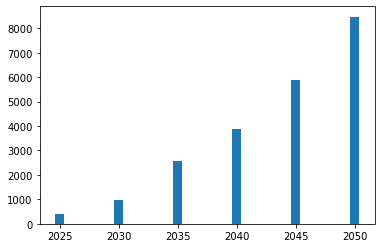

In [34]:
#Years=[2025,2030,2035,2040,2045,2050]
plt.bar(Year2, Spending1)
plt.bar(Year2, SUB, bottom=Spending1)

In [ ]:
GEN_all_years = np.array([F2025, F2030, F2035, F2040, F2045, F2050])
print(GEN_all_years[:, 0])
# len(GenTechClean)
Year=["2025","2030","2035","2040","2045","2050"]
#Year=["1990","2005","2010","2015","2020","2025","2030","2035","2040","2045","2050"]
# 绘图


# plt.style.use(['science', 'no-latex'])
#with plt.style.use('science'):
    # 图形和轴
colormap = mpl.cm.Set3.colors
fig, ax = plt.subplots(1, figsize=(12, 10))
bottom = len(Year) * [0]
for i in range(len(Fuels)):
    plt.bar(Year, GEN_all_years[:, i], bottom = bottom, label = Fuels[i], color=colormap[i])
    bottom += GEN_all_years[:, i]
# for idx, name in enumerate(fields):
#     plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
#     left = left + df_grouped[name]

# 标题、图例、标签
plt.title('Total generation by sector, EJ (Original)', loc='left')
# plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.ylabel('Generation, EJ')
plt.xlabel("Year")
plt.legend()